In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# task1 - load the dataser in pd dataframe
dataset = pd.read_csv('/content/drive/MyDrive/AI/bank.csv')
df = pd.DataFrame(dataset)

In [4]:
# printing the columns with object datatype
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [5]:
# printing the unique values of those object columns
for col in object_columns:
    print(f"Column: {col}")
    print(df[col].unique())

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column: marital
['married' 'single' 'divorced']
Column: education
['tertiary' 'secondary' 'unknown' 'primary']
Column: default
['no' 'yes']
Column: housing
['yes' 'no']
Column: loan
['no' 'yes']
Column: contact
['unknown' 'cellular' 'telephone']
Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column: poutcome
['unknown' 'failure' 'other' 'success']
Column: y
['no' 'yes']


In [6]:
# checking the null values column
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:
#drop all the object in columns to make it numeric
numeric_df = df.select_dtypes(exclude="object")
# saving the df in new cvs
numeric_df.to_csv('numeric_df.csv', index=False)


In [8]:
#checking if the csv is saved or not
import os
os.listdir()

['.config', 'numeric_df.csv', 'drive', 'sample_data']

In [9]:
#reading numerical data of bank and its statistics
dataset = pd.read_csv("/content/numeric_df.csv")
df = pd.DataFrame(dataset)
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# problem 2 - data imputations
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/Dataset/medical_students_dataset.csv")
df = pd.DataFrame(dataset)
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        200

In [11]:
numeric_cols = df.select_dtypes(include="number").columns
catagorical_cols = df.select_dtypes(include="object").columns

# filling numercal data using median
for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

#filling catagorical data
for col in catagorical_cols:
  mode_value = df[col].mode()[0]
  df[col].fillna(mode_value, inplace=True)

df.isnull().sum()

# used the median for numerical data and mode for catagorical data .
# since median dont effect the outerliner


/tmp/ipython-input-74911736.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/tmp/ipython-input-74911736.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

,0
Student ID,0
Age,0
Gender,0
Height,0
Weight,0
Blood Type,0
BMI,0
Temperature,0
Heart Rate,0
Blood Pressure,0


In [12]:
print(f" before removing dublication {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f" after removing dublication {df.duplicated().sum()}")

 before removing dublication 12879
 after removing dublication 0


In [13]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/Dataset/Titanic-Dataset.csv")
df = pd.DataFrame(dataset)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df_subset = df[["Name","Pclass","Sex","Age","Fare","Survived"]]
df_firstclass = df_subset[df_subset["Pclass"] == 1]
df_firstclass

,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1
...,...,...,...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,female,47.0,52.5542,1
872,"Carlsson, Mr. Frans Olof",1,male,33.0,5.0000,0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,female,56.0,83.1583,1
887,"Graham, Miss. Margaret Edith",1,female,19.0,30.0000,1


In [15]:
df_firstclass['Fare'].describe()

,Fare
count,216.000000
mean,84.154687
std,78.380373
min,0.000000
25%,30.923950
50%,60.287500
75%,93.500000
max,512.329200


In [16]:

df_firstclass = df_firstclass.dropna(subset=["Age"])
df_firstclass["Age"].isnull().sum()

np.int64(0)

In [28]:

#embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
#df = pd.concat([df, embarked_dummies], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [31]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/Dataset/Titanic-Dataset.csv")
df = pd.DataFrame(dataset)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
mean_survival = df.groupby('Sex')['Survived'].mean()
mean_survival

,Survived
Sex,
female,0.742038
male,0.188908


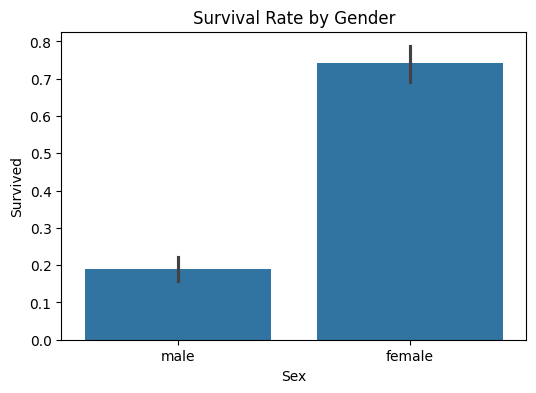

([<matplotlib.patches.Wedge at 0x79274758d5e0>,
 [Text(-0.8839489466764628, 0.6547016569931466, 'female'),
  Text(0.8839491600052938, -0.6547013689659859, 'male')],
 [Text(-0.48215397091443424, 0.3571099947235345, '79.7%'),
  Text(0.4821540872756147, -0.3571098376178104, '20.3%')])

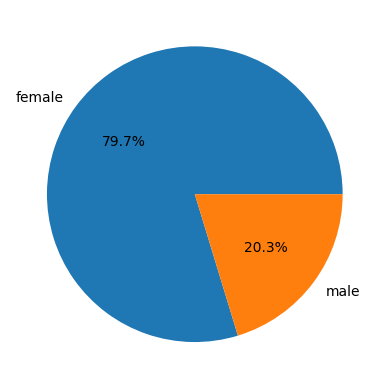

In [41]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title("Survival Rate by Gender")
plt.show()

#plot in pie chart
plt.pie(mean_survival, labels=mean_survival.index, autopct='%1.1f%%')

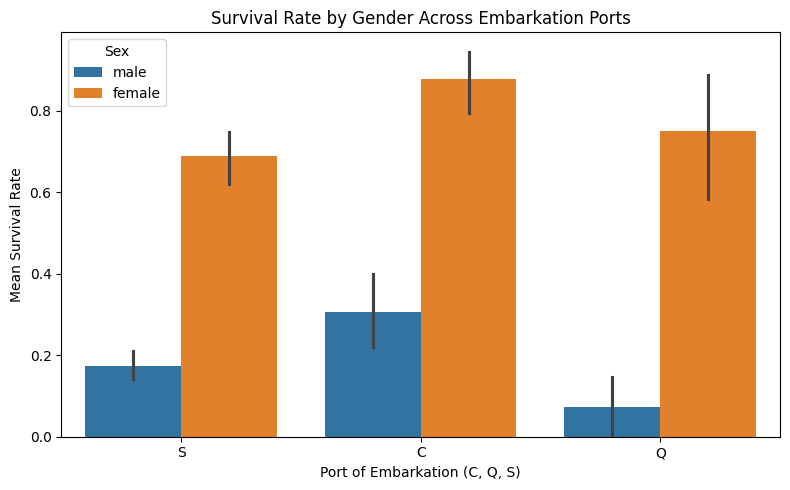

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Embarked', y='Survived', hue='Sex')

plt.title("Survival Rate by Gender Across Embarkation Ports")
plt.xlabel("Port of Embarkation (C, Q, S)")
plt.ylabel("Mean Survival Rate")
plt.tight_layout()
plt.show()